In [2]:
#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearch import *

Cores:  12


/Users/walter/Software/TotoResearch/MyTotoResearch.py:140: DeprecationWarning: invalid escape sequence \s
  test_df = pd.read_csv('../input/TestResult.csv', sep='\s+', header=None, names=['D','N1','N2','N3','N4','N5','N6','N7'])
/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Done.


In [3]:

def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U','K']
    X = df.drop(drop_cols, axis=1)
    return X



In [4]:
def store_prediction(mrt, model, f, scaler=None, name='unnamed'):
    def getAllData(df):
        drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
        X = df.drop(drop_cols, axis=1)
        return X

    test_data = mtr.get_test_data()
    X = mtr.modified_dataset(getAllData(test_data)) #
#    X = getAdjustedDataF(test_data,f)


    if ( scaler == None ):
        Z = X
    else:
        scaler.fit(X)
        Z = scaler.transform(X)

    predictions = model.predict(Z)

    dfResult= pd.DataFrame(predictions, columns=['N1', 'N2', 'N3', 'N4', 'N5','N6', 'N7'])
#    mtr.print_predictions(dfResult)

    global df_predictions
    global prev_r
    r = mtr.getAccuracyCount(np.array(dfResult)) ;
#    if ( r > prev_r ):
#        df_predictions = []
    df_predictions.append(dfResult)
    g_all_pred.update({name : dfResult})



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from keras.models import Input, Model
import keras
from keras.layers import Dense
import time
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
import json as simplejson
from keras import regularizers
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, RidgeClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR, LinearSVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

df_predictions = []


all_models = []

# all_models.append(('SVCpoly01', SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf010', SVC(kernel='rbf', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf011', SVC(kernel='rbf', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf012', SVC(kernel='rbf', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0103', SVC(kernel='rbf', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0113', SVC(kernel='rbf', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0123', SVC(kernel='rbf', coef0=0.25, probability=True, degree=3, random_state=seed)))


# all_models.append(('SVCrbf020', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf021', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf022', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0203', SVC(kernel='sigmoid', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0213', SVC(kernel='sigmoid', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0223', SVC(kernel='sigmoid', coef0=0.25, probability=True, degree=3, random_state=seed)))


# all_models.append(('SVCrbf030', SVC(kernel='linear', coef0=0.75, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf031', SVC(kernel='linear', coef0=0.5, probability=True, degree=2, random_state=seed)))
# all_models.append(('SVCrbf032', SVC(kernel='linear', coef0=0.25, probability=True, degree=2, random_state=seed)))

# all_models.append(('SVCrbf0303', SVC(kernel='linear', coef0=0.75, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0313', SVC(kernel='linear', coef0=0.5, probability=True, degree=3, random_state=seed)))
# all_models.append(('SVCrbf0323', SVC(kernel='linear', coef0=0.25, probability=True, degree=3, random_state=seed)))



# all_models.append(('LR', (LogisticRegression(random_state=seed))))

all_models.append(('KNNC', KNeighborsClassifier()))
all_models.append(('KNNR', KNeighborsRegressor()))
# all_models.append(('RC', RidgeClassifier(random_state=seed)))
# all_models.append(('LR', LogisticRegression(random_state=seed)))
# all_models.append(('LDA', LinearDiscriminantAnalysis()))
# all_models.append(('DTR', DecisionTreeRegressor()))
# all_models.append(('ETR', ExtraTreesRegressor(n_estimators=5)))
# all_models.append(('ETC', ExtraTreesClassifier(n_estimators=5)))
# all_models.append(('EN', ElasticNet()))
# all_models.append(('CART', DecisionTreeClassifier()))
# all_models.append(('NB', GaussianNB()))
# all_models.append(('Lasso', Lasso()))
# all_models.append(('GBR', GradientBoostingRegressor()))
# all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR5', RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=seed)))
# all_models.append(('RFR3', RandomForestRegressor(n_estimators=3, n_jobs=5, random_state=seed)))
# all_models.append(('SGDR', SGDRegressor(random_state=seed)))
# all_models.append(('AdaB', AdaBoostClassifier(RandomForestClassifier(n_estimators=3))))
# #all_models.append(('MLPC', MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)))



Loaded MyTotoResearch algo_no:  1
1521


/Users/walter/Software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [6]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'

g_all_pred = {}

for name, model in all_models:
    
    X = mtr.modified_dataset(getAllData(df)) #
    f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

    scaler = StandardScaler()
    scaler.fit(X)
    Z = scaler.transform(X)
    
#    scaler = None
#    Z = X

#     kfold = model_selection.KFold(n_splits=3, random_state=seed)
#     cv_results = model_selection.cross_val_score(model, Z, mtr.getTarget(3), cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
    oClassifier = MultiOutputClassifier(model, n_jobs=7)
    oClassifier.fit(Z, mtr.getTargets()) 
    print(oClassifier)
    s = oClassifier.score(Z, mtr.getTargets())
    if(oClassifier.score(Z, mtr.getTargets()) == 1.0):
        print( name, ' ', str(f), ' ', str(s))
    store_prediction(mtr, oClassifier, f, scaler=scaler, name=name)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

# for n in range(len(df_predictions)):
#     print( mtr.getAccuracyCount(np.array(df_predictions[n])))
#     mtr.print_predictions(df_predictions[n])






# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

print('Done')

/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
           n_jobs=7)


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1.0  Time taken:  1.0000000000065512e-05  
MultiOutputClassifier(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
           n_jobs=7)
1.0  Time taken:  7.999999999785956e-06  
Done


/Users/walter/Software/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walter/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


import operator
from itertools import islice

top_n = 12

all_pred = [] ;
for i in range(len(df_predictions)):
    if ( i == 0 ):
        all_pred = df_predictions[i]
    else:
        all_pred = np.column_stack((all_pred, df_predictions[i]) )

top_seven = []
for i in range(len(all_pred)):
    unique, counts = np.unique(all_pred[i], return_counts=True)
    x = dict(zip(unique, counts))
    sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
    top_seven.append(list(islice([int(x) for x,y in sorted_x],top_n)))

#print(top_seven)
columns = ['N'+str(i+1) for i in range(top_n)]
df_top_seven = pd.DataFrame(top_seven, columns=columns)
r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
print ( "Accuracy: ",  r)
#print(df_top_seven)
# matched = []
# for (p,a) in zip(df_top_seven.values, mtr.get_test_result()):
#     matched.append(len(set(p.astype(int)) & set(a)))
# bins = np.arange(8) - 0.5
# plt.hist(matched, bins, rwidth=0.8)
# plt.xticks(range(8))
# plt.xlim([-1, 8])
# plt.show()


mtr.plot_matched_counts(df_top_seven.values)


#mtr.print_predictions(df_top_seven)




In [7]:
def combine_prediction(arr, initial_pred=[]):
    global s
    if ( isinstance(arr, list) ):
        for a in arr:
            combine_prediction(a, initial_pred)
        return 
    if ( len(s) > 1 ):
        s += '_'
    s += arr
    initial_pred.append(g_all_pred[arr])
    return 



In [12]:
import itertools
from itertools import combinations
import operator 
from itertools import islice

name_ = []

lst = [name for name, model in all_models]
iBestIndex = -1
iBestN = []
#print("List ", lst)
top_n = 12


dict_accuracy = {}
for z in range(4, 0,-1):
    a = [list(x) for x in itertools.combinations(lst, z) if len(x) > 1 ] 
#    print(a)

    for xx in a:
        test_pred = []
        s = ''
        combine_prediction(xx, test_pred)
#        print(s)

        #print(len(test_pred))

        all_pred = [] ;
        for i in range(len(test_pred)):
            if ( i == 0 ):
                all_pred = test_pred[i]
            else:
                all_pred = np.column_stack((all_pred, test_pred[i]) )

        top_seven = []
        for i in range(len(all_pred)):
            unique, counts = np.unique(all_pred[i], return_counts=True)
            x = dict(zip(unique, counts))
            sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
            l = list(islice([int(x) for x,y in sorted_x],top_n))
            while ( len(l) < top_n ):
                l.append(-1)

            top_seven.append(l)
            

#        print(len(top_seven))
#         if(len(top_seven[0]) < top_n ):
#             print("*** Caught ", )
        columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
#        print(columns)
        df_top_seven = pd.DataFrame(top_seven, columns=columns)
        r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
        matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
        r = sum(weighted_match)

#TODO Provide weights for predictions         
#        weights = [(1+1*(w/10)) for N in df_top_seven]
#        print ( "Accuracy: ",  r)
        dict_accuracy.update({s: r})

t_accuracy = sorted(dict_accuracy.items(),key=operator.itemgetter(1), reverse=True)
print('Done')


Done


In [13]:
# matched = []
# for (p,a) in zip(df_top_seven.values, mtr.get_test_result()):
#     matched.append(len(set(p.astype(int)) & set(a)))
# weighted_match = [(1+2*(N/10)) for N in matched]
matched, weighted_match = mtr.print_weighted_numbers(df_top_seven.values)
print(matched)
print(weighted_match)

[1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 3, 3, 3, 1, 1, 2, 1, 0, 1, 2, 3, 1, 1, 2, 2, 0, 1, 4, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 5, 3, 2, 0, 2, 2, 2, 2, 1, 2]
[1.2, 1.2, 1.2, 1.4, 1.4, 1.0, 1.2, 1.4, 1.4, 1.2, 1.2, 1.0, 1.2, 1.6, 1.6, 1.6, 1.2, 1.2, 1.4, 1.2, 1.0, 1.2, 1.4, 1.6, 1.2, 1.2, 1.4, 1.4, 1.0, 1.2, 1.8, 1.2, 1.2, 1.4, 1.4, 1.4, 1.4, 1.0, 1.2, 1.0, 1.2, 1.4, 1.2, 2.0, 1.6, 1.4, 1.0, 1.4, 1.4, 1.4, 1.4, 1.2, 1.4]


[('KNNC_KNNR', 69.40000000000002)]
[['KNNC', 'KNNR']]
Accuracy:  86.79245283018868


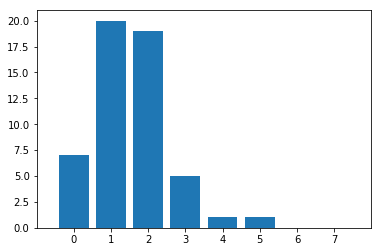

In [14]:
n = 7
print(t_accuracy[:n])

a = [x[0].split('_') for x in t_accuracy[:n] ] 
print(a)
for xx in a:
    test_pred = []
    s = ''
    combine_prediction(xx, test_pred)
    all_pred = [] ;
    for i in range(len(test_pred)):
        if ( i == 0 ):
            all_pred = test_pred[i]
        else:
            all_pred = np.column_stack((all_pred, test_pred[i]) )

    top_seven = []
    for i in range(len(all_pred)):
        unique, counts = np.unique(all_pred[i], return_counts=True)
        x = dict(zip(unique, counts))
        sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True) # sorted by value
        l = list(islice([int(x) for x,y in sorted_x],top_n))
        while ( len(l) < top_n ):
          l.append(-1)
        top_seven.append(l)


    columns = ['N'+str(i+1) for i in range(len(top_seven[0]))]
    df_top_seven = pd.DataFrame(top_seven, columns=columns)
    r = mtr.getAccuracyCount(np.array(df_top_seven)) ;
    print ( "Accuracy: ",  r)
    dict_accuracy.update({s: r})
    mtr.plot_matched_counts(df_top_seven.values)





def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}


prev_r = 0

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

#Deep Neuro Network
for n in range(1,2):
    X = mtr.modified_dataset(getAllData(df)) #
    f = 1.0 #365/27.58
#    X = getAdjustedDataF(df,f)

    scaler = StandardScaler()
    scaler.fit(X)
    Z = scaler.transform(X)

    clf = SGDClassifier(random_state=42)

    model = MultiOutputClassifier(clf, n_jobs=7)
    model.fit(Z, mtr.getTargets()) 
    print(model)
    s = model.score(Z, mtr.getTargets())
    if(model.score(Z, mtr.getTargets()) == 1.0):
        print( str(f), ' ', str(s))
    store_prediction(mtr, model, f)
    start = time.clock()
    print(str(f), " Time taken: ", (time.clock() - start),  " ")

print("Done.")
# mtr = MyTotoResearch(algo_no=1)
# lresult, df = mtr.load_totodata()

# test_data = mtr.get_test_data()

for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n])))
    mtr.print_predictions(df_predictions[n])


#69.81 => MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='relu', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)
#75.47 =>  MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='sgd', verbose=0,  random_state=42,tol=0.000000001)
#64.15 =>  MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='adam', verbose=0,  random_state=42,tol=0.000000001)
#62  MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='tanh', learning_rate='adaptive', solver='lbfgs', verbose=0,  random_state=42,tol=0.000000001)
#71.69 => MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=2000, alpha=0.001, activation='logistic', learning_rate='adaptive', solver='lbfgs', verbose=0,  random_state=42,tol=0.000000001)

#75.47 => SVC(kernel='poly', coef0=0.05, probability=True, degree=2, random_state=42, tol=1e-03)



#69.81 => SVC(random_state=42)



In [ ]:

# Nov 26
# 16 22 28 31 38 46 33

In [ ]:
[('SVMLREN', 83.01886792452831), 
 ('SVMLRLasso', 83.01886792452831), 
 ('RidgeETC', 81.13207547169812), 
 ('RCETC', 81.13207547169812), 
 ('ETCRidge', 81.13207547169812), 
 ('SVMDTRRFR', 79.24528301886792), 
 ('KNNCLDADTR', 79.24528301886792), 
 ('KNNCLDASGDR', 79.24528301886792), ('LDADTRETC', 79.24528301886792), ('DTRENLasso', 79.24528301886792), ('SVMLR', 79.24528301886792), ('SVMLDA', 79.24528301886792), ('SVMEN', 79.24528301886792), ('SVMLasso', 79.24528301886792), ('RidgeDTR', 79.24528301886792), ('RCDTR', 79.24528301886792), ('DTRRidge', 79.24528301886792), ('SVMLRKNNR', 77.35849056603774), ('SVMLRSGDR', 77.35849056603774), ('SVMKNNRLR', 77.35849056603774), ('SVMLDAEN', 77.35849056603774), ('SVMLDANB', 77.35849056603774), ('SVMLDALasso', 77.35849056603774), ('SVMDTRETC', 77.35849056603774), ('SVMDTREN', 77.35849056603774), ('SVMDTRLasso', 77.35849056603774), ('SVMDTRSGDR', 77.35849056603774), ('SVMENLasso', 77.35849056603774), ('LRKNNCDTR', 77.35849056603774), ('LRKNNCEN', 77.35849056603774), ('LRKNNCLasso', 77.35849056603774), ('LRKNNCRFR', 77.35849056603774), ('LRKNNCSGDR', 77.35849056603774), ('LRETCEN', 77.35849056603774), ('LRETCLasso', 77.35849056603774), ('RidgeDTRETC', 77.35849056603774), ('RidgeDTREN', 77.35849056603774), ('RidgeDTRLasso', 77.35849056603774), ('RidgeDTRSGDR', 77.35849056603774), ('KNNCLRDTR', 77.35849056603774), ('KNNCLREN', 77.35849056603774), ('KNNCLRLasso', 77.35849056603774), ('KNNCLRRFR', 77.35849056603774), ('KNNCLRSGDR', 77.35849056603774), ('KNNCLDAEN', 77.35849056603774), ('KNNCLDALasso', 77.35849056603774), ('RCDTRETC', 77.35849056603774), ('RCDTREN', 77.35849056603774), ('RCDTRLasso', 77.35849056603774), ('RCDTRSGDR', 77.35849056603774), ('DTRETCNB', 77.35849056603774), ('DTRETCRidge', 77.35849056603774), ('DTRENRidge', 77.35849056603774), ('DTRRidgeLasso', 77.35849056603774), ('DTRRidgeSGDR', 77.35849056603774), ('ENLassoAdaB', 77.35849056603774), ('LRETC', 77.35849056603774), ('RidgeEN', 77.35849056603774), ('RidgeLasso', 77.35849056603774), ('RCEN', 77.35849056603774), ('RCLasso', 77.35849056603774), ('LDAETC', 77.35849056603774), ('DTRETC', 77.35849056603774), ('ENRidge', 77.35849056603774), ('SVMLRNB', 75.47169811320755), ('SVMLRGBR', 75.47169811320755), ('SVMLRRFR', 75.47169811320755), ('SVMDTRCART', 75.47169811320755), ('SVMETCSGDR', 75.47169811320755), ('LRDTRETC', 75.47169811320755), ('LRENLasso', 75.47169811320755), ('RidgeKNNCSGDR', 75.47169811320755), ('RidgeDTRRFR', 75.47169811320755), ('RidgeENLasso', 75.47169811320755), ('KNNCRCSGDR', 75.47169811320755), ('KNNCDTRETC', 75.47169811320755), ('KNNCENNB', 75.47169811320755), ('KNNCENLasso', 75.47169811320755), ('KNNCENSGDR', 75.47169811320755), ('KNNCNBLasso', 75.47169811320755), ('KNNCRidgeSGDR', 75.47169811320755), ('KNNCLassoSGDR', 75.47169811320755), ('KNNCRFRSGDR', 75.47169811320755), ('RCDTRRFR', 75.47169811320755), ('RCENLasso', 75.47169811320755), ('LDADTREN', 75.47169811320755), ('LDADTRLasso', 75.47169811320755), ('LDADTRRFR', 75.47169811320755), ('LDADTRSGDR', 75.47169811320755), ('LDAENLasso', 75.47169811320755), ('DTRRidgeRFR', 75.47169811320755), ('ENRidgeLasso', 75.47169811320755), ('ENLassoRFR', 75.47169811320755), ('SVMETC', 75.47169811320755), ('LRDTR', 75.47169811320755), ('KNNRETC', 75.47169811320755), ('LDADTR', 75.47169811320755), ('SVMLRKNNC', 73.58490566037736), ('SVMKNNCLR', 73.58490566037736), ('SVMKNNCSGDR', 73.58490566037736), ('SVMKNNRDTR', 73.58490566037736), ('SVMKNNRETC', 73.58490566037736), ('SVMLDADTR', 73.58490566037736), ('SVMLDASGDR', 73.58490566037736), ('SVMDTRNB', 73.58490566037736), ('LRKNNCNB', 73.58490566037736), ('LRKNNCGBR', 73.58490566037736), ('LRKNNCAdaB', 73.58490566037736), ('LRETCNB', 73.58490566037736), ('LRETCRFR', 73.58490566037736), ('LRETCSGDR', 73.58490566037736), ('LRENRFR', 73.58490566037736), ('LRLassoRFR', 73.58490566037736), ('RidgeDTRNB', 73.58490566037736), ('KNNCKNNRDTR', 73.58490566037736), ('KNNCLRNB', 73.58490566037736), ('KNNCLRGBR', 73.58490566037736), ('KNNCLRAdaB', 73.58490566037736), ('KNNCLDARFR', 73.58490566037736), ('KNNCDTRSGDR', 73.58490566037736), ('KNNCNBSGDR', 73.58490566037736), ('RCDTRNB', 73.58490566037736), ('LDADTRCART', 73.58490566037736), ('LDADTRGBR', 73.58490566037736), ('LDAETCNB', 73.58490566037736), ('DTRETCRFR', 73.58490566037736), ('DTRCARTRFR', 73.58490566037736), ('DTRNBRidge', 73.58490566037736), ('ETRENLasso', 73.58490566037736), ('ETCENLasso', 73.58490566037736), ('ENNBLasso', 73.58490566037736), ('SVMDTR', 73.58490566037736), ('LREN', 73.58490566037736), ('LRLasso', 73.58490566037736), ('RidgeLDA', 73.58490566037736), ('KNNCDTR', 73.58490566037736), ('RCLDA', 73.58490566037736), ('LDAEN', 73.58490566037736), ('LDARidge', 73.58490566037736), ('LDALasso', 73.58490566037736), ('DTRRFR', 73.58490566037736), ('ETCCART', 73.58490566037736), ('ETCRFR', 73.58490566037736), ('ETCSGDR', 73.58490566037736), ('ENLasso', 73.58490566037736), ('SVMLRLDA', 71.69811320754717), ('SVMRidgeEN', 71.69811320754717), ('SVMRidgeLasso', 71.69811320754717), ('SVMKNNRLDA', 71.69811320754717), ('SVMKNNREN', 71.69811320754717), ('SVMKNNRLasso', 71.69811320754717), ('SVMRCEN', 71.69811320754717), ('SVMRCLasso', 71.69811320754717), ('SVMLDAETC', 71.69811320754717), ('SVMLDAGBR', 71.69811320754717), ('SVMDTRGBR', 71.69811320754717), ('SVMETCEN', 71.69811320754717), ('SVMETCLasso', 71.69811320754717), ('SVMETCGBR', 71.69811320754717), ('SVMENRidge', 71.69811320754717), ('SVMENGBR', 71.69811320754717), ('SVMENRFR', 71.69811320754717), ('SVMENSGDR', 71.69811320754717), ('SVMLassoGBR', 71.69811320754717), ('SVMLassoRFR', 71.69811320754717), ('SVMLassoSGDR', 71.69811320754717), ('SVMRFRSGDR', 71.69811320754717), ('LRKNNCCART', 71.69811320754717), ('LRDTREN', 71.69811320754717), ('LRDTRLasso', 71.69811320754717), ('LRDTRRFR', 71.69811320754717), ('LRENNB', 71.69811320754717), ('LRENGBR', 71.69811320754717), ('LRENSGDR', 71.69811320754717), ('LRNBLasso', 71.69811320754717), ('LRNBSGDR', 71.69811320754717), ('LRLassoGBR', 71.69811320754717), ('LRLassoSGDR', 71.69811320754717), ('LRRFRSGDR', 71.69811320754717), ('RidgeKNNCEN', 71.69811320754717), ('RidgeKNNCNB', 71.69811320754717), ('RidgeKNNCLasso', 71.69811320754717), ('RidgeKNNRDTR', 71.69811320754717), ('RidgeDTRCART', 71.69811320754717), ('RidgeDTRGBR', 71.69811320754717), ('RidgeETCNB', 71.69811320754717), ('RidgeETCSGDR', 71.69811320754717), ('RidgeENNB', 71.69811320754717), ('RidgeENAdaB', 71.69811320754717), ('RidgeNBLasso', 71.69811320754717), ('RidgeLassoAdaB', 71.69811320754717), ('RidgeRFRSGDR', 71.69811320754717), ('KNNCRCEN', 71.69811320754717), ('KNNCRCNB', 71.69811320754717), ('KNNCRCLasso', 71.69811320754717), ('KNNCLRCART', 71.69811320754717), ('KNNCLDAGBR', 71.69811320754717), ('KNNCDTREN', 71.69811320754717), ('KNNCDTRNB', 71.69811320754717), ('KNNCDTRLasso', 71.69811320754717), ('KNNCDTRGBR', 71.69811320754717), ('KNNCDTRRFR', 71.69811320754717), ('KNNCENRidge', 71.69811320754717), ('KNNCCARTNB', 71.69811320754717), ('KNNCCARTSGDR', 71.69811320754717), ('KNNCNBRidge', 71.69811320754717), ('KNNCRidgeLasso', 71.69811320754717), ('KNNRRCDTR', 71.69811320754717), ('KNNRDTRRidge', 71.69811320754717), ('RCDTRCART', 71.69811320754717), ('RCDTRGBR', 71.69811320754717), ('RCETCNB', 71.69811320754717), ('RCETCSGDR', 71.69811320754717), ('RCENNB', 71.69811320754717), ('RCENAdaB', 71.69811320754717), ('RCNBLasso', 71.69811320754717), ('RCLassoAdaB', 71.69811320754717), ('RCRFRSGDR', 71.69811320754717), ('LDAETCRFR', 71.69811320754717), ('LDAENNB', 71.69811320754717), ('LDANBLasso', 71.69811320754717), ('DTRETCCART', 71.69811320754717), ('DTRETCSGDR', 71.69811320754717), ('DTRCARTRidge', 71.69811320754717), ('DTRCARTSGDR', 71.69811320754717), ('DTRNBRFR', 71.69811320754717), ('DTRRidgeGBR', 71.69811320754717), ('ETRETCRFR', 71.69811320754717), ('ETCNBRidge', 71.69811320754717), ('ETCRidgeSGDR', 71.69811320754717), ('ENNBRidge', 71.69811320754717), ('ENRidgeAdaB', 71.69811320754717), ('ENLassoGBR', 71.69811320754717), ('CARTRFRSGDR', 71.69811320754717), ('NBRidgeLasso', 71.69811320754717), ('SVMNB', 71.69811320754717), ('SVMGBR', 71.69811320754717), ('SVMSGDR', 71.69811320754717), ('LRRFR', 71.69811320754717), ('LRAdaB', 71.69811320754717), ('RidgeKNNR', 71.69811320754717), ('RidgeNB', 71.69811320754717), ('KNNCSGDR', 71.69811320754717), ('KNNRRC', 71.69811320754717), ('KNNREN', 71.69811320754717), ('KNNRRidge', 71.69811320754717), ('KNNRLasso', 71.69811320754717), ('RCNB', 71.69811320754717), ('LDACART', 71.69811320754717), ('LDAAdaB', 71.69811320754717), ('DTRCART', 71.69811320754717), ('DTRNB', 71.69811320754717), ('ETCNB', 71.69811320754717), ('ENSGDR', 71.69811320754717), ('NBRidge', 71.69811320754717), ('LassoSGDR', 71.69811320754717), ('GBRRFR', 71.69811320754717), ('SVMLRDTR', 69.81132075471697), ('SVMLRETR', 69.81132075471697), ('SVMLRETC', 69.81132075471697), ('SVMLRAdaB', 69.81132075471697), ('SVMRidgeNB', 69.81132075471697), ('SVMRidgeSGDR', 69.81132075471697), ('SVMKNNCLDA', 69.81132075471697), ('SVMKNNRNB', 69.81132075471697), ('SVMKNNRSGDR', 69.81132075471697), ('SVMRCNB', 69.81132075471697), ('SVMRCSGDR', 69.81132075471697), ('SVMDTRETR', 69.81132075471697), ('SVMETCNB', 69.81132075471697), ('SVMETCRFR', 69.81132075471697), ('SVMENCART', 69.81132075471697), ('SVMENNB', 69.81132075471697), ('SVMENAdaB', 69.81132075471697), ('SVMCARTLasso', 69.81132075471697), ('SVMCARTSGDR', 69.81132075471697), ('SVMNBRidge', 69.81132075471697), ('SVMNBLasso', 69.81132075471697), ('SVMNBSGDR', 69.81132075471697), ('SVMLassoAdaB', 69.81132075471697), ('LRKNNCETC', 69.81132075471697), ('LRKNNREN', 69.81132075471697), ('LRKNNRNB', 69.81132075471697), ('LRKNNRLasso', 69.81132075471697), ('LRLDADTR', 69.81132075471697), ('LRLDAEN', 69.81132075471697), ('LRLDACART', 69.81132075471697), ('LRLDALasso', 69.81132075471697), ('LRDTRNB', 69.81132075471697), ('LRDTRGBR', 69.81132075471697), ('LRDTRSGDR', 69.81132075471697), ('LRETRETC', 69.81132075471697), ('LRETCGBR', 69.81132075471697), ('LRENAdaB', 69.81132075471697), ('LRNBGBR', 69.81132075471697), ('LRLassoAdaB', 69.81132075471697), ('LRGBRRFR', 69.81132075471697), ('RidgeKNNCDTR', 69.81132075471697), ('RidgeKNNCCART', 69.81132075471697), ('RidgeKNNCGBR', 69.81132075471697), ('RidgeKNNREN', 69.81132075471697), ('RidgeKNNRLasso', 69.81132075471697), ('RidgeLDAEN', 69.81132075471697), ('RidgeLDALasso', 69.81132075471697), ('RidgeETCEN', 69.81132075471697), ('RidgeETCLasso', 69.81132075471697), ('RidgeENGBR', 69.81132075471697), ('RidgeNBSGDR', 69.81132075471697), ('RidgeLassoGBR', 69.81132075471697), ('RidgeSGDRAdaB', 69.81132075471697), ('KNNCRCDTR', 69.81132075471697), ('KNNCRCCART', 69.81132075471697), ('KNNCRCGBR', 69.81132075471697), ('KNNCLRETC', 69.81132075471697), ('KNNCLDACART', 69.81132075471697), ('KNNCLDAAdaB', 69.81132075471697), ('KNNCDTRRidge', 69.81132075471697), ('KNNCETRSGDR', 69.81132075471697), ('KNNCENGBR', 69.81132075471697), ('KNNCCARTRidge', 69.81132075471697), ('KNNCNBGBR', 69.81132075471697), ('KNNCNBRFR', 69.81132075471697), ('KNNCRidgeGBR', 69.81132075471697), ('KNNCLassoGBR', 69.81132075471697), ('KNNCGBRSGDR', 69.81132075471697), ('KNNRRCEN', 69.81132075471697), ('KNNRRCLasso', 69.81132075471697), ('KNNRLREN', 69.81132075471697), ('KNNRLRNB', 69.81132075471697), ('KNNRLRLasso', 69.81132075471697), ('KNNRLDADTR', 69.81132075471697), ('KNNRLDAEN', 69.81132075471697), ('KNNRLDANB', 69.81132075471697), ('KNNRLDALasso', 69.81132075471697), ('KNNRDTRETC', 69.81132075471697), ('KNNRDTRCART', 69.81132075471697), ('KNNRENRidge', 69.81132075471697), ('KNNRENLasso', 69.81132075471697), ('KNNRRidgeLasso', 69.81132075471697), ('RCLDAEN', 69.81132075471697), ('RCLDALasso', 69.81132075471697), ('RCETCEN', 69.81132075471697), ('RCETCLasso', 69.81132075471697), ('RCENGBR', 69.81132075471697), ('RCNBSGDR', 69.81132075471697), ('RCLassoGBR', 69.81132075471697), ('RCSGDRAdaB', 69.81132075471697), ('LDADTRNB', 69.81132075471697), ('LDAETCEN', 69.81132075471697), ('LDAETCLasso', 69.81132075471697), ('LDAETCSGDR', 69.81132075471697), ('LDAENCART', 69.81132075471697), ('LDAENRidge', 69.81132075471697), ('LDAENSGDR', 69.81132075471697), ('LDACARTLasso', 69.81132075471697), ('LDACARTSGDR', 69.81132075471697), ('LDANBGBR', 69.81132075471697), ('LDANBSGDR', 69.81132075471697), ('LDARidgeLasso', 69.81132075471697), ('LDALassoSGDR', 69.81132075471697), ('LDARFRSGDR', 69.81132075471697), ('DTRENAdaB', 69.81132075471697), ('DTRNBSGDR', 69.81132075471697), ('DTRLassoAdaB', 69.81132075471697), ('DTRRFRSGDR', 69.81132075471697), ('ETCENRidge', 69.81132075471697), ('ETCNBGBR', 69.81132075471697), ('ETCNBSGDR', 69.81132075471697), ('ETCRidgeLasso', 69.81132075471697), ('ENCARTLasso', 69.81132075471697), ('ENRidgeGBR', 69.81132075471697), ('ENLassoSGDR', 69.81132075471697), ('ENRFRSGDR', 69.81132075471697), ('NBRidgeSGDR', 69.81132075471697), ('LassoRFRSGDR', 69.81132075471697), ('GBRRFRRFR', 69.81132075471697), ('GBRRFRSGDR', 69.81132075471697), ('RFRRFRSGDR', 69.81132075471697), ('SVMRidge', 69.81132075471697), ('SVMKNNR', 69.81132075471697), ('SVMRC', 69.81132075471697), ('LRRidge', 69.81132075471697), ('LRRC', 69.81132075471697), ('RidgeLR', 69.81132075471697), ('RidgeRFR', 69.81132075471697), ('RidgeSGDR', 69.81132075471697), ('KNNCETC', 69.81132075471697), ('KNNCNB', 69.81132075471697), ('RCLR', 69.81132075471697), ('RCRFR', 69.81132075471697), ('RCSGDR', 69.81132075471697), ('LDANB', 69.81132075471697), ('LDARFR', 69.81132075471697), ('DTRGBR', 69.81132075471697), ('ETCEN', 69.81132075471697), ('ETCLasso', 69.81132075471697), ('ETCGBR', 69.81132075471697), ('ENRFR', 69.81132075471697), ('NBRFR', 69.81132075471697), ('LassoRFR', 69.81132075471697), ('RFRSGDR', 69.81132075471697), ('SVMLRRidge', 67.9245283018868), ('SVMLRRC', 67.9245283018868), ('SVMLRLR', 67.9245283018868), ('SVMLRCART', 67.9245283018868), ('SVMRidgeKNNC', 67.9245283018868), ('SVMRidgeLR', 67.9245283018868), ('SVMRidgeETC', 67.9245283018868), ('SVMRidgeCART', 67.9245283018868), ('SVMRidgeGBR', 67.9245283018868), ('SVMKNNCRC', 67.9245283018868), ('SVMKNNCDTR', 67.9245283018868), ('SVMKNNCEN', 67.9245283018868), ('SVMKNNCRidge', 67.9245283018868), ('SVMKNNCLasso', 67.9245283018868), ('SVMKNNRCART', 67.9245283018868), ('SVMKNNRGBR', 67.9245283018868), ('SVMRCLR', 67.9245283018868), ('SVMRCETC', 67.9245283018868), ('SVMRCCART', 67.9245283018868), ('SVMRCGBR', 67.9245283018868), ('SVMLDACART', 67.9245283018868), ('SVMLDARFR', 67.9245283018868), ('SVMLDAAdaB', 67.9245283018868), ('SVMETRETC', 67.9245283018868), ('SVMETCCART', 67.9245283018868), ('SVMETCRidge', 67.9245283018868), ('SVMCARTRidge', 67.9245283018868), ('SVMGBRRFR', 67.9245283018868), ('SVMGBRSGDR', 67.9245283018868), ('SVMGBRAdaB', 67.9245283018868), ('SVMSGDRAdaB', 67.9245283018868), ('LRRidgeETC', 67.9245283018868), ('LRRidgeEN', 67.9245283018868), ('LRRidgeLasso', 67.9245283018868), ('LRKNNCKNNR', 67.9245283018868), ('LRKNNCLDA', 67.9245283018868), ('LRKNNRLDA', 67.9245283018868), ('LRRCETC', 67.9245283018868), ('LRRCEN', 67.9245283018868), ('LRRCLasso', 67.9245283018868), ('LRLDAETC', 67.9245283018868), ('LRLDAGBR', 67.9245283018868), ('LRLDASGDR', 67.9245283018868), ('LRETCRidge', 67.9245283018868), ('LRETCAdaB', 67.9245283018868), ('LRENRidge', 67.9245283018868), ('LRGBRSGDR', 67.9245283018868), ('LRRFRRFR', 67.9245283018868), ('RidgeKNNCAdaB', 67.9245283018868), ('RidgeKNNRNB', 67.9245283018868), ('RidgeKNNRSGDR', 67.9245283018868), ('RidgeRCEN', 67.9245283018868), ('RidgeRCCART', 67.9245283018868), ('RidgeRCLasso', 67.9245283018868), ('RidgeLRETC', 67.9245283018868), ('RidgeLREN', 67.9245283018868), ('RidgeLRLasso', 67.9245283018868), ('RidgeDTRETR', 67.9245283018868), ('RidgeETCGBR', 67.9245283018868), ('RidgeENRidge', 67.9245283018868), ('RidgeENRFR', 67.9245283018868), ('RidgeENSGDR', 67.9245283018868), ('RidgeCARTRidge', 67.9245283018868), ('RidgeNBGBR', 67.9245283018868), ('RidgeNBAdaB', 67.9245283018868), ('RidgeRidgeLasso', 67.9245283018868), ('RidgeLassoRFR', 67.9245283018868), ('RidgeLassoSGDR', 67.9245283018868), ('RidgeGBRRFR', 67.9245283018868), ('RidgeGBRAdaB', 67.9245283018868), ('KNNCKNNRLR', 67.9245283018868), ('KNNCKNNREN', 67.9245283018868), ('KNNCKNNRNB', 67.9245283018868), ('KNNCKNNRLasso', 67.9245283018868), ('KNNCKNNRSGDR', 67.9245283018868), ('KNNCRCAdaB', 67.9245283018868), ('KNNCLRLDA', 67.9245283018868), ('KNNCLDAETC', 67.9245283018868), ('KNNCLDANB', 67.9245283018868), ('KNNCDTRCART', 67.9245283018868), ('KNNCETREN', 67.9245283018868), ('KNNCETRLasso', 67.9245283018868), ('KNNCETCSGDR', 67.9245283018868), ('KNNCENRFR', 67.9245283018868), ('KNNCRidgeAdaB', 67.9245283018868), ('KNNCLassoRFR', 67.9245283018868), ('KNNRRCNB', 67.9245283018868), ('KNNRRCSGDR', 67.9245283018868), ('KNNRLRLDA', 67.9245283018868), ('KNNRETCNB', 67.9245283018868), ('KNNRNBRidge', 67.9245283018868), ('KNNRRidgeSGDR', 67.9245283018868), ('KNNRRFRRFR', 67.9245283018868), ('


In [ ]:
20180514   [17 24 29 45 46 49  5]   [ 8. 22. 16. 19. 39. 43.]   []
20180517   [ 7 21 25 29 35 37 13]   [16.  6. 34. 40. 35. 43.]   [35]
20180521   [ 8 10 16 30 37 44 17]   [ 5.  9. 16. 26. 24. 43.]   [16]
20180524   [11 25 26 34 36 42 16]   [ 5.  9. 16. 26. 45. 36.]   [16 26 36]
20180528   [ 5  9 27 28 30 44  2]   [ 5.  9. 16. 38. 39. 43.]   [5 9]
20180531   [11 13 24 26 47 49 33]   [20.  9. 23. 26. 34. 43.]   [26]
20180604   [20 22 31 37 43 45 27]   [ 5.  9. 16. 26. 22. 43.]   [22 43]
20180607   [12 20 29 31 37 39 42]   [ 8.  9. 16. 27. 22. 41.]   []
20180611   [16 25 30 37 44 49 34]   [ 5. 20. 25. 38. 44. 42.]   [25 44]
20180614   [ 4 29 31 35 42 48  1]   [18.  6. 18. 26. 32. 36.]   []
20180618   [11 15 22 23 26 43 25]   [18.  6. 16. 26. 22. 36.]   [22 26]
201806

75.47169811320755
20180514   [17 24 29 45 46 49  5]   [ 2. 35. 30. 17. 25. 27.]   [17]
20180517   [ 7 21 25 29 35 37 13]   [ 5. 33. 36. 16. 25. 31.]   [25]
20180521   [ 8 10 16 30 37 44 17]   [ 5. 27. 30. 18. 33. 38.]   [30]
20180524   [11 25 26 34 36 42 16]   [ 5. 26. 30. 18. 29. 45.]   [26]
20180528   [ 5  9 27 28 30 44  2]   [ 5.  7. 12. 18. 22. 38.]   [5]
20180531   [11 13 24 26 47 49 33]   [ 5. 35. 12. 38. 33. 41.]   [33]
20180604   [20 22 31 37 43 45 27]   [ 5.  7. 12. 18. 24. 38.]   []
20180607   [12 20 29 31 37 39 42]   [ 5. 35. 12. 38. 22. 40.]   [12]
20180611   [16 25 30 37 44 49 34]   [22. 27. 28. 38. 33. 38.]   []
20180614   [ 4 29 31 35 42 48  1]   [ 5. 36. 30. 23. 24. 31.]   [31]
20180618   [11 15 22 23 26 43 25]   [13. 36. 30. 17. 22. 36.]   [22]
20180621   [ 4  6 15 24 30 35 46]   [10. 20. 23. 28. 32. 42.]   []
20180625   [ 2  5 25 38 44 48  9]   [15. 18. 20. 27. 41. 40.]   []
20180628   [ 2  7 22 27 40 47 48]   [12. 15. 27. 35. 41. 43.]   [27]
20180702   [12 13 26 33 35 38 23]   [ 8.  7. 19. 35. 41. 43.]   [35]
20180705   [ 8 11 28 30 32 34 39]   [ 9. 18. 17. 28. 37. 42.]   [28]
20180709   [ 6 23 31 38 39 43 33]   [12. 23. 26. 28. 36. 40.]   [23]
20180712   [ 4 15 25 32 40 41 10]   [ 5. 23. 35. 29. 32. 45.]   [32]
20180716   [ 4  8 19 24 32 47 22]   [ 8. 19. 27. 24. 31. 38.]   [ 8 19 24]
20180719   [13 14 23 35 37 46 45]   [10. 17. 27. 32. 40. 41.]   []
20180723   [ 2 23 26 28 39 40 12]   [23. 23. 33. 28. 31. 43.]   [23 28]
20180726   [ 1  9 13 17 28 40 37]   [11. 28. 30. 32. 34. 39.]   [28]
20180730   [ 8 10 19 20 41 43  7]   [ 8. 23. 26. 24. 35. 38.]   [8]
20180802   [ 1 10 15 27 41 46 35]   [ 3.  9. 25. 29. 40. 48.]   []
20180806   [ 7 18 20 27 36 40 15]   [ 6. 15. 24. 30. 35. 45.]   [15]
20180809   [13 16 20 23 39 42 28]   [11. 22. 23. 27. 35. 43.]   [23]
20180813   [ 1  3  6 16 22 36 17]   [ 4. 18. 31. 35. 42. 44.]   []
20180816   [22 23 25 32 33 36 20]   [ 7. 18. 34. 31. 34. 44.]   []
20180820   [ 9 10 25 38 40 42  2]   [ 9. 18. 26. 27. 39. 44.]   [9]
20180823   [ 2  3 23 30 39 41 19]   [ 8. 18. 23. 37. 43. 44.]   [23]
20180827   [ 5  6 16 24 26 29 38]   [ 8. 17. 23. 27. 41. 44.]   []
20180830   [ 3  9 27 29 31 40 46]   [ 8. 18. 27. 32. 41. 44.]   [27]
20180903   [ 4  5 13 18 39 40  3]   [10. 18. 22. 27. 36. 42.]   [18]
20180906   [ 2 15 17 20 23 30 45]   [ 7. 18. 23. 27. 41. 44.]   [23]
20180910   [ 2  6  9 15 40 43 18]   [ 7. 18. 19. 27. 41. 44.]   [18]
20180913   [ 6 16 17 40 44 48 34]   [11. 18. 17. 27. 41. 44.]   [17 44]
20180917   [16 21 22 24 25 27  1]   [ 7. 18. 17. 27. 41. 44.]   [27]
20180920   [ 5 12 18 30 32 38 22]   [11. 18. 22. 27. 41. 44.]   [18 22]
20180924   [ 6  8 17 24 29 47 34]   [ 7. 18. 19. 31. 38. 45.]   []
20180927   [ 2 25 29 33 42 45 20]   [11. 18. 23. 31. 41. 44.]   []
20181001   [11 15 23 24 32 40 43]   [11. 18. 17. 31. 41. 44.]   [11]
20181004   [ 5 12 23 32 37 42 43]   [ 7. 18. 22. 27. 41. 44.]   []
20181008   [17 18 23 39 43 49  2]   [ 4. 11. 22. 30. 30. 45.]   []
20181011   [ 1 16 18 24 29 46 35]   [ 9. 18. 23. 32. 41. 43.]   [18]
20181015   [ 1  4 24 32 35 48 20]   [ 7. 18. 17. 31. 35. 45.]   [35]
20181018   [ 5 14 17 31 46 48 47]   [ 5. 13. 17. 31. 40. 45.]   [ 5 17 31]
20181022   [ 5 22 24 40 43 48  2]   [ 5. 15. 25. 31. 38. 42.]   [5]
20181025   [ 7  8 13 15 35 48 30]   [14. 17. 22. 34. 38. 42.]   []
20181029   [ 2  6 10 20 28 31 30]   [ 6. 15. 19. 31. 40. 44.]   [ 6 31]
20181101   [ 6 27 28 41 44 48 15]   [ 6. 15. 23. 27. 41. 44.]   [ 6 15 27 41 44]
20181101   [ 6 27 28 41 44 48 15]   [ 8. 15. 29. 27. 34. 41.]   [15 27 41]

20181105   [ 3  8 14 28 43 49 26]   [11. 18. 23. 31. 41. 44.]   []
20181108   [ 8 13 16 26 28 38 46]   [ 7. 17. 23. 31. 38. 45.]   [38]
20181112   [ 4 12 21 34 41 47 33]   [ 8. 12. 22. 31. 41. 44.]   [12 41]
20181115  Predicted:  [10. 18. 22. 27. 40. 44.]  
20181119  Predicted:  [ 9. 18. 19. 27. 35. 45.]  
20181122  Predicted:  [ 9. 18. 22. 27. 35. 41.]  
20181126  Predicted:  [ 6. 18. 23. 27. 38. 44.]  
20181129  Predicted:  [ 7. 18. 23. 30. 35. 44.]  
20181203  Predicted:  [ 7. 18. 17. 31. 41. 45.]  
20181206  Predicted:  [ 7. 18. 17. 27. 35. 44.]  
20181210  Predicted:  [ 6. 18. 17. 31. 41. 45.]  
20181213  Predicted:  [ 7. 18. 17. 31. 41. 44.]  
20181217  Predicted:  [ 7. 18. 19. 27. 35. 44.]  
20181220  Predicted:  [ 7. 18. 23. 31. 41. 44.]  
20181224  Predicted:  [ 7. 18. 22. 27. 41. 44.]  
20181227  Predicted:  [ 8. 18. 23. 27. 41. 44.]  
20181231  Predicted:  [ 9. 18. 23. 27. 41. 44.]  

In [ ]:
#Keep track of all results
#df_predictions = []

#print(df_predictions)
#mtr = MyTotoResearch(algo_no=1)
def getAllData(df):
    drop_cols = ['T', 'L','M','S','R','E','A','V' ,'J','U','K']
    X = df.drop(drop_cols, axis=1)
    return X

lresult, df = mtr.load_totodata()

test_data = mtr.get_test_data()
X = mtr.modified_dataset(getAllData(test_data)) #

print(len(df_predictions))
for n in range(len(df_predictions)):
    print( mtr.getAccuracyCount(np.array(df_predictions[n])))
    mtr.print_predictions(df_predictions[n])



In [ ]:
dOld = dfResult
#2 9 14 36 46 48 5



20180514   [17 24 29 45 46 49  5]   [ 4. 18. 22. 24. 25. 36.]   [24]
20180514   [17 24 29 45 46 49  5]   [ 7. 17. 22. 24. 39. 45.]   [17 24 45]
20180514   [17 24 29 45 46 49  5]   [ 6. 14. 34. 24. 25. 27.]   [24]
20180514   [17 24 29 45 46 49  5]   [ 7.  9. 22. 24. 42. 45.]   [24 45]
20180514   [17 24 29 45 46 49  5]   [ 7.  9. 22. 24. 42. 45.]   [24 45]
